# Initialization


### Employment
First, need to consider the employment dataset. The employment excel file has 17 table in total, each corresponds to one particular year. The first year is started with 2004 and ended with 2020. In each table, there are 35 different variables with respect to different economic factors such as unemployment and economic activity. These variables corresponds to each column while each row corresponds to different local authority who publish the results. The local authority are kept to be the same over the period. 

In [2]:
import numpy as np
import pandas as pd
import math
import os
import pickle
import copy
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')

# loading data set
EMPLOYMENT = pd.read_csv("EMPLOYMENT.csv",dtype = "object",na_values=["*","-","!"],skiprows=6)
EMPLOYMENT

,local authority: county / unitary (as of April 2021),mnemonic,row,Numerator,Denominator,Economic activity rate - aged 16-64,Conf,Numerator.1,Denominator.1,Employment rate - aged 16-64,...,% of all people aged 16+ who are male,Conf.45,Numerator.46,Denominator.46,% of all people aged 16+ who are female,Conf.46,Numerator.47,Denominator.47,% of all people aged 16+ who are aged 16-64,Conf.47
0,Darlington,E06000005,1,47600,62400,76.2,2.6,46300,62400,74.2,...,47.7,2.6,42100,80500,52.3,2.6,62400,80500,77.4,2.2
1,County Durham,E06000047,2,224500,318000,70.6,1.4,213300,318000,67.1,...,48.0,1.4,206900,398100,52.0,1.4,318000,398100,79.9,1.1
2,Hartlepool,E06000001,3,38400,55900,68.7,2.6,35200,55900,63.0,...,47.7,2.5,37000,70700,52.3,2.5,55900,70700,79.1,2.0
3,Middlesbrough,E06000002,4,62100,88700,70.0,2.5,56400,88700,63.6,...,48.3,2.4,56400,109200,51.7,2.4,88700,109200,81.2,1.9
4,Northumberland,E06000057,5,145300,194700,74.6,1.4,138900,194700,71.4,...,48.3,1.4,127200,245900,51.7,1.4,194700,245900,79.2,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4102,NaN,level of uncertainty for data below this level...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4103,NaN,detailed estimates are likely to reflect the f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4104,NaN,changes were not targeted at the detailed leve...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4105,NaN,should not be compared against previous years.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
EMPLOYMENT['row']
#Note there are some NaN value. These arises because between each table there are some explanations. We need to exclude these lines.

0         1
1         2
2         3
3         4
4         5
       ... 
4102    NaN
4103    NaN
4104    NaN
4105    NaN
4106    NaN
Name: row, Length: 4107, dtype: object

In [4]:
#exclude lines with NaN value in row column
Employmentall = EMPLOYMENT.dropna(subset=["row"])
#drop rows that has information
a = ['row']
Employmentall = Employmentall[~Employmentall['row'].isin(a)]
Employmentall

,local authority: county / unitary (as of April 2021),mnemonic,row,Numerator,Denominator,Economic activity rate - aged 16-64,Conf,Numerator.1,Denominator.1,Employment rate - aged 16-64,...,% of all people aged 16+ who are male,Conf.45,Numerator.46,Denominator.46,% of all people aged 16+ who are female,Conf.46,Numerator.47,Denominator.47,% of all people aged 16+ who are aged 16-64,Conf.47
0,Darlington,E06000005,1,47600,62400,76.2,2.6,46300,62400,74.2,...,47.7,2.6,42100,80500,52.3,2.6,62400,80500,77.4,2.2
1,County Durham,E06000047,2,224500,318000,70.6,1.4,213300,318000,67.1,...,48.0,1.4,206900,398100,52.0,1.4,318000,398100,79.9,1.1
2,Hartlepool,E06000001,3,38400,55900,68.7,2.6,35200,55900,63.0,...,47.7,2.5,37000,70700,52.3,2.5,55900,70700,79.1,2.0
3,Middlesbrough,E06000002,4,62100,88700,70.0,2.5,56400,88700,63.6,...,48.3,2.4,56400,109200,51.7,2.4,88700,109200,81.2,1.9
4,Northumberland,E06000057,5,145300,194700,74.6,1.4,138900,194700,71.4,...,48.3,1.4,127200,245900,51.7,1.4,194700,245900,79.2,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4079,South Ayrshire,S12000028,202,48800,64700,75.4,4.1,46500,64700,71.9,...,48.0,3.5,49800,95600,52.0,3.5,64700,95600,67.7,3.3
4080,South Lanarkshire,S12000029,203,157700,197500,79.8,3.5,151800,197500,76.9,...,47.1,3.7,130100,246000,52.9,3.7,197500,246000,80.3,3.0
4081,Stirling,S12000030,204,45300,58700,77.2,3.9,43900,58700,74.8,...,51.3,3.6,37200,76400,48.7,3.6,58700,76400,76.9,3.1
4082,West Dunbartonshire,S12000039,205,42700,55500,76.9,3.6,40400,55500,72.8,...,46.9,3.3,40300,75800,53.1,3.3,55500,75800,73.2,2.9


In [5]:
#Now we have no na values. Here we have 3518 rows, which each 206rows corresponds to one year. Append a year column:
Employmentall['year']=0

#show the year column, should be all zeros
Employmentall['year']

0       0
1       0
2       0
3       0
4       0
       ..
4079    0
4080    0
4081    0
4082    0
4083    0
Name: year, Length: 3502, dtype: int64

In [6]:
#here manually write all year onto the dataframe
for i in range(17):
    Employmentall['year'][i*206:(i+1)*206] = 2004+i

In [7]:
#now check the year value:
Employmentall['year']

0       2004
1       2004
2       2004
3       2004
4       2004
        ... 
4079    2020
4080    2020
4081    2020
4082    2020
4083    2020
Name: year, Length: 3502, dtype: int64

In [8]:
#list all the column names
list(Employmentall)[5]

'Economic activity rate - aged 16-64'

There may be the case when there are some county that changes the coucil's name. Here we list all the councils

In [9]:
#employmentall is the dataframe containing all entries in the employment dataset but disgards any empty line
authorityname = list(Employmentall['local authority: county / unitary (as of April 2021)'].unique())
len(authorityname)

206

We have 206 authority hence this means that all county has their name kept to the same along 17 years.

We can also make the data into a dictionary so that each region has a table of variables and in time scale. 

In [10]:
#dict_all = {c: pd.DataFrame() for c in countries}
dict_all = {c: pd.DataFrame() for c in authorityname}
for c in authorityname:    # memory-intensive
    #dict_all[c] = all_data[all_data['GeoAreaName'].isin(['{}'.format(c)])]
    dict_all[c] = Employmentall[Employmentall['local authority: county / unitary (as of April 2021)'].isin(['{}'.format(c)])]


In [11]:
#check the dictionary
dict_all['Darlington']

,local authority: county / unitary (as of April 2021),mnemonic,row,Numerator,Denominator,Economic activity rate - aged 16-64,Conf,Numerator.1,Denominator.1,Employment rate - aged 16-64,...,Conf.45,Numerator.46,Denominator.46,% of all people aged 16+ who are female,Conf.46,Numerator.47,Denominator.47,% of all people aged 16+ who are aged 16-64,Conf.47,year
0,Darlington,E06000005,1,47600,62400,76.2,2.6,46300,62400,74.2,...,2.6,42100,80500,52.3,2.6,62400,80500,77.4,2.2,2004
233,Darlington,E06000005,1,47500,62800,75.6,2.5,45700,62800,72.8,...,2.6,41900,79900,52.5,2.6,62800,79900,78.6,2.1,2005
467,Darlington,E06000005,1,49300,64600,76.3,2.5,47500,64600,73.5,...,2.6,42700,81200,52.6,2.6,64600,81200,79.5,2.1,2006
701,Darlington,E06000005,1,50600,65900,76.7,2.6,47400,65900,71.9,...,2.7,43000,83100,51.8,2.7,65900,83100,79.3,2.2,2007
935,Darlington,E06000005,1,50100,65600,76.4,2.6,47300,65600,72.1,...,2.7,43100,82400,52.3,2.7,65600,82400,79.6,2.2,2008
1169,Darlington,E06000005,1,49300,66100,74.6,2.6,45300,66100,68.5,...,2.7,42400,81400,52.1,2.7,66100,81400,81.2,2.1,2009
1403,Darlington,E06000005,1,49900,65600,76.1,2.6,46500,65600,70.8,...,2.7,43700,85400,51.1,2.7,65600,85400,76.8,2.3,2010
1637,Darlington,E06000005,1,49600,66700,74.4,2.8,45200,66700,67.8,...,2.8,45500,87000,52.2,2.8,66700,87000,76.7,2.4,2011
1886,Darlington,E06000005,1,51100,66400,77.0,2.6,45500,66400,68.5,...,2.7,45900,88300,52.0,2.7,66400,88300,75.2,2.3,2012
2135,Darlington,E06000005,1,52100,65700,79.3,2.5,47900,65700,72.9,...,2.6,46400,87900,52.7,2.6,65700,87900,74.8,2.3,2013


In [12]:
Employmentall['% all in employment who are - 1: managers, directors and senior officials (SOC2010)'].values
employmat = np.zeros([206,18])
employmat[:,0] = Employmentall['% all in employment who are - 1: managers, directors and senior officials (SOC2010)'].values[1*206:(1+1)*206]
employmat

array([[ 9.4,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 7.9,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 7.5,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       ...,
       [10.8,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 5.9,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 9.4,  0. ,  0. , ...,  0. ,  0. ,  0. ]])

In [13]:
def Getemploymentvariable(varname):
    #initialize an empty matrix to store year for column and local authority as row
    employmat = np.zeros([206,17])
    for i in range(17):
        employmat[:,i] = Employmentall[varname].values[206*i:206*(i+1)]
    return employmat

In [14]:
employmentmanagersector = Getemploymentvariable('% all in employment who are - 1: managers, directors and senior officials (SOC2010)')

### Earning Dataset
 Earning dataset, or Annual Survey of Hours and Earning(ASHE), is a dataset containing revenue as well as the records
of Customs Pay As You Earn (PAYE) extracted from a sample with 1 percentage of total employee. It consists of all the information on levels of salary with respect to types of payment, types of
employment segment, and types of statistical measures that illustrate the pattern of wages among
employees in the UK. There are 54 tables with respect to different pespect. We only need three datasets, namely median earnings, upper quartile earnings and lower quartile earnings as our chosen dataset.

In [15]:
# loading data set
earnings = pd.read_csv("earnings.csv",dtype = "object",na_values=["*","-","!","#"],skiprows=8)
earnings

,local authority: county / unitary (as of April 2021),2004,Conf %,2005,Conf %.1,2006,Conf %.2,2007,Conf %.3,2008,...,2016,Conf %.12,2017,Conf %.13,2018,Conf %.14,2019,Conf %.15,2020,Conf %.16
0,Darlington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17550,...,22580,8.3,22889,11.0,21867,9.3,23520,8.3,24634,9.9
1,County Durham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18805,...,21996,4.8,22986,4.4,23158,5.0,24000,3.3,23877,5.3
2,Hartlepool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19703,...,22160,7.4,22971,12.0,22322,8.0,22890,12.0,22651,11.0
3,Middlesbrough,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16018,...,18687,9.1,18454,9.3,19120,13.0,21082,9.6,22171,11.0
4,Northumberland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18540,...,21391,5.4,22353,4.9,21382,5.1,22046,8.8,23427,8.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,NaN,Estimates for 2011 and subsequent years use a ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4092,NaN,occupations which have been coded according to...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4093,NaN,Classification (SOC) 2010 that replaced SOC 20...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4094,NaN,should be taken when making comparisons with e...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# we first take out the confidence interval columns 
earningsnew = earnings.drop(["Conf %", "Conf %.1", "Conf %.2","Conf %.3","Conf %.4","Conf %.5","Conf %.6","Conf %.7","Conf %.8","Conf %.9","Conf %.10","Conf %.11","Conf %.12","Conf %.13","Conf %.14","Conf %.15","Conf %.16"], axis=1)

In [17]:
#now the dataframe has no columns for confidence interval 
earningsnew

,local authority: county / unitary (as of April 2021),2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Darlington,NaN,NaN,NaN,NaN,17550,19369,19356,18979,18510,19640,20206,20659,22580,22889,21867,23520,24634
1,County Durham,NaN,NaN,NaN,NaN,18805,18817,19718,19841,20631,20999,21261,21448,21996,22986,23158,24000,23877
2,Hartlepool,NaN,NaN,NaN,NaN,19703,20223,20146,19737,20994,20852,20925,21855,22160,22971,22322,22890,22651
3,Middlesbrough,NaN,NaN,NaN,NaN,16018,17761,16887,16628,18188,17380,16618,18732,18687,18454,19120,21082,22171
4,Northumberland,NaN,NaN,NaN,NaN,18540,19578,19199,19771,19911,19760,20025,20721,21391,22353,21382,22046,23427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,NaN,Estimates for 2011 and subsequent years use a ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4092,NaN,occupations which have been coded according to...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4093,NaN,Classification (SOC) 2010 that replaced SOC 20...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4094,NaN,should be taken when making comparisons with e...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#here we take total median annual gross pay:
earningsmatrix=earningsnew.values[:206,1:]

#Take also the total annual gross pay with 25 percentile:
earningsmatrix_25 = earningsnew.values[456:456+206,1:]

#and the annual gross pay with 75 percentile:
earningsmatrix_75 = earningsnew.values[912:912+206,1:]


In [19]:
#check list of local authority is equal or not:
localauthorityearning = list(earningsnew['local authority: county / unitary (as of April 2021)'].unique())

In [20]:
#define a function to see if there is any difference. If there is no difference in county authority of two dataset, then the difference will return an empty list
def findingdifference(A,B):
    faltlist = []
    for i in range(206):
        if (A[i]!=B[i]):
            faltlist.append(i)
    return faltlist
findingdifference(authorityname,localauthorityearning)

[]

Now since two dataset have the same authority, can now compare their distance correlation.Imputation in the first step is to take 0.

In [21]:
employmentmanagersector

array([[ 9.2,  9.4, 10.1, ...,  9.9,  7.9, 10. ],
       [ 7.9,  7.9,  8. , ...,  8.5, 10. , 10.4],
       [ 9.2,  7.5,  8.3, ...,  9.1,  6. ,  8.7],
       ...,
       [ 8.6, 10.8,  9.7, ..., 12.7, 12.3, 13.1],
       [ 4.6,  5.9,  7.2, ...,  7.4,  6.3,  5.3],
       [ 9.1,  9.4, 10.3, ...,  9.7,  9.8,  9.3]])

In [22]:
earningsmatrix = np.array(earningsmatrix,dtype=float)
earningmatrix = np.nan_to_num(earningsmatrix,nan=0)
employmentmanagersector = np.nan_to_num(employmentmanagersector,nan=0)
earningmatrix

array([[    0.,     0.,     0., ..., 21867., 23520., 24634.],
       [    0.,     0.,     0., ..., 23158., 24000., 23877.],
       [    0.,     0.,     0., ..., 22322., 22890., 22651.],
       ...,
       [    0.,     0.,     0., ..., 25761.,     0., 26607.],
       [    0.,     0.,     0., ..., 22798., 22900., 23877.],
       [    0.,     0.,     0., ..., 23931., 25055., 27152.]])

# Population Density

Dataset of population Estimate consist of estimation of population based on the census which is
revised annually based on demographic trends in the previous year. The estimation is available
in authority level.

In [23]:
# loading data set
popd = pd.read_csv("Population_estimate.csv",dtype = "object",na_values=["*","-","!","#"],skiprows=5)
popd

,local authority: county / unitary (as of April 2021),2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Darlington,99343,100287,101509,102632,103694,104355,105028,105584,105503,105726,105877,105998,106327,106347,106566,106803,107402
1,County Durham,495147,497218,499348,502960,505617,507311,510628,512994,514261,515923,517573,519347,521776,523662,526980,530094,533149
2,Hartlepool,90317,90457,90781,90969,91379,91530,91773,92088,92261,92662,92606,92498,92845,93019,93242,93663,93836
3,Middlesbrough,138451,138517,138169,138190,137885,137273,137667,138368,138726,138911,138991,139310,140326,140639,140545,140980,141285
4,Northumberland,310140,310752,311375,312960,314057,314489,315463,316278,316489,316389,316832,316453,317444,319030,320274,322434,323820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Lisburn and Castlereagh,125764,127043,128185,129179,130584,132386,133909,135280,136311,136808,138627,140205,141181,142640,144381,146002,146452
213,Mid and East Antrim,129925,130980,132021,133270,134169,134774,135157,135365,135838,135997,136642,137145,137821,138152,138773,139274,139443
214,Mid Ulster,122645,124885,127662,131088,133595,135408,137221,139011,140357,141329,142895,144002,145389,146427,147392,148528,148953
215,"Newry, Mourne and Down",158460,160453,162723,165634,168019,169652,171119,172276,173691,174829,175403,176369,177816,178996,180012,181368,181669


In [24]:
# loading data set
areaa = pd.read_csv("Counties_and_Unitary_Authorities_(December_2020)_UK_BFC.csv",dtype = "object",na_values=["*","-","!","#"])
areaa

,OBJECTID,CTYUA20CD,CTYUA20NM,CTYUA20NMW,BNG_E,BNG_N,LONG,LAT,Shape__Area,Shape__Length
0,1,E06000001,Hartlepool,,447160,531474,-1.27018,54.67614,93712628.8483276,71007.4432848009
1,2,E06000002,Middlesbrough,,451141,516887,-1.21099,54.54467,53881564.2714233,44481.6912420955
2,3,E06000003,Redcar and Cleveland,,464361,519597,-1.00608,54.56752,245069508.91684,96703.9897012835
3,4,E06000004,Stockton-on-Tees,,444940,518183,-1.30664,54.55691,204932953.781616,123408.985927677
4,5,E06000005,Darlington,,428029,515648,-1.56835,54.53534,197475688.992432,107206.401677287
...,...,...,...,...,...,...,...,...,...,...
211,212,W06000020,Torfaen,Torfaen,327459,200480,-3.05101,51.69836,126239927.800671,82544.7759674217
212,213,W06000021,Monmouthshire,Sir Fynwy,337812,209231,-2.9028,51.77827,850326621.90501,224917.251558841
213,214,W06000022,Newport,Casnewydd,337897,187432,-2.89769,51.58231,190431131.368683,153216.416923137
214,215,W06000023,Powys,Powys,302329,273255,-3.43531,52.34864,5195311014.65457,610132.027463481


In [25]:
#initialize list of authorities in dataset popd
listpopa = popd.loc[:,'local authority: county / unitary (as of April 2021)']
#initialize list of authorities in dataset areaa
listareaa = areaa.loc[:,'CTYUA20NM']

#initialize a population area to store all zeros
popd['area']=0
for i in range(len(listpopa)):
    for j in range(len(listareaa)):
        if listpopa[i]==listareaa[j]:
            popd.iloc[i,-1] = areaa.iloc[j,-2]

            
popd.loc[:,'area']

0      197475688.992432
1      2231459817.94682
2      93712628.8483276
3      53881564.2714233
4      5032241479.11702
             ...       
212    510438068.178669
213    1061355466.99172
214     1957293802.6211
215    1682340589.11644
216    566472954.625679
Name: area, Length: 217, dtype: object

In [26]:
#check if there is 0
lista =[index for index in range(len(listpopa)) if popd.loc[index,'area']==0]
authoritymissing = [listpopa[i] for i in lista]
authoritymissing

list(popd.iloc[i,1:-1])

['150912',
 '152233',
 '153488',
 '154406',
 '155014',
 '156058',
 '156518',
 '156943',
 '157637',
 '157640',
 '157931',
 '158797',
 '159593',
 '160098',
 '160864',
 '161725',
 '162056']

In [27]:
#complete these areas by estimates in wikipedia
popd.iloc[lista[0],-1] = 987000000
popd.iloc[lista[1],-1] = 634000000
popd.iloc[lista[2],-1] = 424000000

#get the density by dividing the whole row with respect to the last value
for i in range(len(listpopa)):
    popd.iloc[i,1:-1]=[float(list(popd.iloc[i,1:-1])[j])/float(popd.iloc[i,-1]) for j in range(17)]

popd

,local authority: county / unitary (as of April 2021),2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,area
0,Darlington,0.000503,0.000508,0.000514,0.00052,0.000525,0.000528,0.000532,0.000535,0.000534,0.000535,0.000536,0.000537,0.000538,0.000539,0.00054,0.000541,0.000544,197475688.992432
1,County Durham,0.000222,0.000223,0.000224,0.000225,0.000227,0.000227,0.000229,0.00023,0.00023,0.000231,0.000232,0.000233,0.000234,0.000235,0.000236,0.000238,0.000239,2231459817.94682
2,Hartlepool,0.000964,0.000965,0.000969,0.000971,0.000975,0.000977,0.000979,0.000983,0.000985,0.000989,0.000988,0.000987,0.000991,0.000993,0.000995,0.000999,0.001001,93712628.8483276
3,Middlesbrough,0.00257,0.002571,0.002564,0.002565,0.002559,0.002548,0.002555,0.002568,0.002575,0.002578,0.00258,0.002585,0.002604,0.00261,0.002608,0.002616,0.002622,53881564.2714233
4,Northumberland,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,0.000063,0.000063,0.000063,0.000063,0.000063,0.000063,0.000063,0.000063,0.000064,0.000064,0.000064,5032241479.11702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Lisburn and Castlereagh,0.000246,0.000249,0.000251,0.000253,0.000256,0.000259,0.000262,0.000265,0.000267,0.000268,0.000272,0.000275,0.000277,0.000279,0.000283,0.000286,0.000287,510438068.178669
213,Mid and East Antrim,0.000122,0.000123,0.000124,0.000126,0.000126,0.000127,0.000127,0.000128,0.000128,0.000128,0.000129,0.000129,0.00013,0.00013,0.000131,0.000131,0.000131,1061355466.99172
214,Mid Ulster,0.000063,0.000064,0.000065,0.000067,0.000068,0.000069,0.00007,0.000071,0.000072,0.000072,0.000073,0.000074,0.000074,0.000075,0.000075,0.000076,0.000076,1957293802.6211
215,"Newry, Mourne and Down",0.000094,0.000095,0.000097,0.000098,0.0001,0.000101,0.000102,0.000102,0.000103,0.000104,0.000104,0.000105,0.000106,0.000106,0.000107,0.000108,0.000108,1682340589.11644


# Authority region and type

Authority region and type is not included in our analysis, but it is one of the chosen condition I included initially. Here is just inclusion of the dataset into desired dataframe. 

In [41]:
# meta-list of authorities with respect to their type
authoritynames=authorityname 
authoritytypes = {'Unitary authorities': ['Darlington', 'County Durham', 'Hartlepool','Middlesbrough', 'Northumberland', 'Redcar and Cleveland', 'Stockton-on-Tees','Blackburn with Darwen', 'Blackpool', 'Cheshire East', 'Cheshire West and Chester', 'Halton', 'Warrington',authoritynames[35],'North East Lincolnshire', 'North Lincolnshire', 'York','Derby', 'Leicester', 'Nottingham', 'Rutland','North Northamptonshire', 'West Northamptonshire', 'Herefordshire, County of', 'Shropshire', 'Stoke-on-Trent', 'Telford and Wrekin','Bedford', 'Central Bedfordshire', 'Luton', 'Peterborough', 'Southend-on-Sea', 'Thurrock','Bracknell Forest', 'Brighton and Hove', 'Isle of Wight', 'Medway', 'Milton Keynes', 'Portsmouth', 'Reading', 'Slough', 'Southampton', 'West Berkshire', 'Windsor and Maidenhead', 'Wokingham', 'Buckinghamshire','Bath and North East Somerset', 'Bristol, City of', 'Cornwall', 'North Somerset', 'Plymouth', 'Bournemouth, Christchurch and Poole', 'South Gloucestershire', 'Swindon', 'Torbay', 'Wiltshire','Dorset'], 
           'Metropolitan district': ['Gateshead', 'Newcastle upon Tyne', 'North Tyneside', 'South Tyneside', 'Sunderland', 'Bolton', 'Bury', 'Manchester', 'Oldham', 'Rochdale', 'Salford', 'Stockport', 'Tameside', 'Trafford', 'Wigan', 'Knowsley', 'Liverpool', 'Sefton', 'St. Helens', 'Wirral','Barnsley', 'Doncaster', 'Rotherham', 'Sheffield', 'Bradford', 'Calderdale', 'Kirklees', 'Leeds', 'Wakefield', 'Birmingham', 'Coventry', 'Dudley', 'Sandwell', 'Solihull', 'Walsall', 'Wolverhampton',authoritynames[161],authoritynames[165],'Newport', 'Aberdeen City',authoritynames[179],authoritynames[184],authoritynames[188]], 
           'County Councils': [authoritynames[18], authoritynames[29], authoritynames[40], 'Derbyshire', 'Leicestershire', 'Lincolnshire', 'Nottinghamshire', 'Staffordshire', 'Warwickshire',authoritynames[73],'Cambridgeshire', 'Essex', 'Hertfordshire', 'Norfolk', 'Suffolk','East Sussex', 'Hampshire', 'Kent', 'Oxfordshire', 'Surrey', 'West Sussex',authoritynames[147],'Gloucestershire', 'Somerset','Swansea', 'Isle of Anglesey', 'Gwynedd', 'Conwy', 'Denbighshire', 'Flintshire', 'Wrexham', 'Powys', 'Ceredigion', 'Pembrokeshire', 'Carmarthenshire','Neath Port Talbot', 'Bridgend', 'Vale of Glamorgan','Rhondda Cynon Taff', 'Merthyr Tydfil', 'Caerphilly', 'Blaenau Gwent', 'Torfaen', 'Monmouthshire','Aberdeenshire', 'Angus', 'Argyll and Bute', 'Clackmannanshire', 'Dumfries and Galloway','East Ayrshire', 'East Dunbartonshire', 'East Lothian', 'East Renfrewshire','Na h-Eileanan Siar', 'Falkirk', 'Fife','Highland', 'Inverclyde', 'Midlothian', 'Moray', 'North Ayrshire', 'North Lanarkshire', 'Orkney Islands', 'Perth and Kinross', 'Renfrewshire', 'Scottish Borders', 'Shetland Islands', 'South Ayrshire', 'South Lanarkshire', 'Stirling', 'West Dunbartonshire', 'West Lothian'], 
           'London boroughs': [authoritynames[36],'Camden', 'City of London','Hackney', 'Hammersmith and Fulham', 'Haringey', 'Islington', 'Kensington and Chelsea', 'Lambeth', 'Lewisham', 'Newham', 'Southwark', 'Tower Hamlets', 'Wandsworth', 'Westminster', 'Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Kingston upon Thames', 'Merton', 'Redbridge', 'Richmond upon Thames', 'Sutton', 'Waltham Forest'], }

Create another list where correspondant authority type is given a value:

In [42]:
authoritytypesindex = {'Unitary authorities':0, 'Metropolitan district':1,  'County Councils':2 ,'London boroughs':3}

Similar for authority region

In [43]:
# meta-list of authorities with respect to their region

# meta-list of authorities with respect to their type

authorityregions = {'England': ['Darlington','County Durham','Hartlepool','Middlesbrough','Northumberland','Redcar and Cleveland','Stockton-on-Tees','Gateshead','Newcastle upon Tyne','North Tyneside','South Tyneside','Sunderland','Blackburn with Darwen','Blackpool','Cheshire East','Cheshire West and Chester','Halton', 'Warrington', 'Cumbria', 'Bolton', 'Bury', 'Manchester', 'Oldham', 'Rochdale', 'Salford', 'Stockport', 'Tameside', 'Trafford', 'Wigan', 'Lancashire', 'Knowsley', 'Liverpool', 'Sefton', 'St. Helens', 'Wirral', 'East Riding of Yorkshire', 'Kingston upon Hull, City of', 'North East Lincolnshire', 'North Lincolnshire', 'York', 'North Yorkshire', 'Barnsley', 'Doncaster', 'Rotherham', 'Sheffield', 'Bradford', 'Calderdale', 'Kirklees', 'Leeds', 'Wakefield', 'Derby', 'Leicester', 'Nottingham', 'Rutland', 'Derbyshire', 'Leicestershire', 'Lincolnshire', 'Nottinghamshire', 'North Northamptonshire', 'West Northamptonshire', 'Herefordshire, County of', 'Shropshire', 'Stoke-on-Trent', 'Telford and Wrekin', 'Staffordshire', 'Warwickshire', 'Birmingham', 'Coventry', 'Dudley', 'Sandwell', 'Solihull', 'Walsall', 'Wolverhampton', 'Worcestershire', 'Bedford', 'Central Bedfordshire', 'Luton', 'Peterborough', 'Southend-on-Sea', 'Thurrock', 'Cambridgeshire', 'Essex', 'Hertfordshire', 'Norfolk', 'Suffolk', 'Camden', 'City of London', 'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Islington', 'Kensington and Chelsea', 'Lambeth', 'Lewisham', 'Newham', 'Southwark', 'Tower Hamlets', 'Wandsworth', 'Westminster', 'Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Kingston upon Thames', 'Merton', 'Redbridge', 'Richmond upon Thames', 'Sutton', 'Waltham Forest', 'Bracknell Forest', 'Brighton and Hove', 'Isle of Wight', 'Medway', 'Milton Keynes', 'Portsmouth', 'Reading', 'Slough', 'Southampton', 'West Berkshire', 'Windsor and Maidenhead', 'Wokingham', 'Buckinghamshire', 'East Sussex', 'Hampshire', 'Kent', 'Oxfordshire', 'Surrey', 'West Sussex', 'Bath and North East Somerset', 'Bristol, City of', 'Cornwall', 'North Somerset', 'Plymouth', 'Bournemouth, Christchurch and Poole', 'South Gloucestershire', 'Swindon', 'Torbay', 'Wiltshire', 'Devon', 'Dorset','Gloucestershire', 'Somerset'], 
           'Wales': ['Isle of Anglesey', 'Gwynedd', 'Conwy', 'Denbighshire', 'Flintshire', 'Wrexham', 'Powys', 'Ceredigion', 'Pembrokeshire', 'Carmarthenshire', 'Swansea', 'Neath Port Talbot', 'Bridgend', 'Vale of Glamorgan', 'Cardiff', 'Rhondda Cynon Taff', 'Merthyr Tydfil', 'Caerphilly', 'Blaenau Gwent', 'Torfaen', 'Monmouthshire','Newport'], 
           'Scotland': ['Aberdeen City', 'Aberdeenshire', 'Angus', 'Argyll and Bute', 'Clackmannanshire', 'Dumfries and Galloway', 'Dundee City', 'East Ayrshire', 'East Dunbartonshire', 'East Lothian', 'East Renfrewshire', 'City of Edinburgh', 'Na h-Eileanan Siar', 'Falkirk', 'Fife','Glasgow City', 'Highland', 'Inverclyde', 'Midlothian', 'Moray', 'North Ayrshire', 'North Lanarkshire', 'Orkney Islands', 'Perth and Kinross', 'Renfrewshire', 'Scottish Borders', 'Shetland Islands', 'South Ayrshire', 'South Lanarkshire', 'Stirling', 'West Dunbartonshire', 'West Lothian'], }

In [44]:
authorityregionindex = {'England':0, 'Wales':1,  'Scotland':2 }

## Combining dataset and sorting dataset

It is better to combine the two dataset into the form we need and make their column to be year values and rows to be values for variables.

In [45]:
#First consider darington only. We create a subset first consisting only 45 variables in employment dataset.
subset_darlington = pd.DataFrame()
for j in range(48):
    subset_darlington[list(Employmentall)[5+4*j]] = dict_all['Darlington'][list(Employmentall)[5+4*j]]
subset_darlington

,Economic activity rate - aged 16-64,Employment rate - aged 16-64,% aged 16-64 who are employees,% aged 16-64 who are self employed,Unemployment rate - aged 16-64,Unemployment rate - aged 16+,% who are economically inactive - aged 16-64,% of economically inactive who want a job,% of economically inactive who do not want a job,Economic activity rate males - aged 16-64,...,% of ethnic minority aged 16-64 who are economically inactive,% with NVQ4+ - aged 16-64,% with NVQ3+ - aged 16-64,% with NVQ2+ - aged 16-64,% with NVQ1+ - aged 16-64,% with other qualifications (NVQ) - aged 16-64,% with no qualifications (NVQ) - aged 16-64,% of all people aged 16+ who are male,% of all people aged 16+ who are female,% of all people aged 16+ who are aged 16-64
0,76.2,74.2,66.8,6.8,2.7,2.6,23.8,20.3,79.7,83.0,...,37.7,23.7,41.4,61.9,75.9,5.7,18.3,47.7,52.3,77.4
233,75.6,72.8,64.7,7.6,3.7,3.8,24.4,21.8,78.2,82.1,...,25.9,25.6,42.1,60.9,74.5,4.8,20.6,47.5,52.5,78.6
467,76.3,73.5,66.2,6.7,3.7,3.7,23.7,24.4,75.6,81.5,...,17.6,27.1,45.8,64.3,79.0,6.1,14.9,47.4,52.6,79.5
701,76.7,71.9,65.0,6.6,6.2,6.2,23.3,24.1,75.9,82.8,...,23.3,29.1,47.7,67.8,82.3,5.5,12.2,48.2,51.8,79.3
935,76.4,72.1,64.2,7.5,5.6,5.8,23.6,25.0,75.0,82.3,...,25.9,29.4,48.4,67.7,80.5,6.2,13.4,47.7,52.3,79.6
1169,74.6,68.5,59.4,8.7,8.2,8.1,25.4,23.2,76.8,82.3,...,20.3,29.4,47.2,67.9,81.1,5.8,13.1,47.9,52.1,81.2
1403,76.1,70.8,61.6,9.0,6.9,6.8,23.9,16.9,83.1,81.4,...,34.5,30.9,49.4,69.3,82.1,6.5,11.4,48.9,51.1,76.8
1637,74.4,67.8,60.5,6.8,8.9,8.8,25.6,19.6,80.4,81.0,...,24.8,27.3,47.0,69.0,82.0,6.9,11.1,47.8,52.2,76.7
1886,77.0,68.5,58.6,9.3,11.0,10.7,23.0,23.5,76.5,82.8,...,NaN,27.6,48.3,68.1,80.9,6.4,12.7,48.0,52.0,75.2
2135,79.3,72.9,63.1,9.1,8.0,8.0,20.7,19.7,80.3,83.0,...,22.6,30.6,53.0,72.4,84.5,5.7,9.7,47.3,52.7,74.8


In [46]:
#Now we add another column consisting all the earnings 
subset_darlington['earnings'] = earningsnew.values[0,1:]
subset_darlington

,Economic activity rate - aged 16-64,Employment rate - aged 16-64,% aged 16-64 who are employees,% aged 16-64 who are self employed,Unemployment rate - aged 16-64,Unemployment rate - aged 16+,% who are economically inactive - aged 16-64,% of economically inactive who want a job,% of economically inactive who do not want a job,Economic activity rate males - aged 16-64,...,% with NVQ4+ - aged 16-64,% with NVQ3+ - aged 16-64,% with NVQ2+ - aged 16-64,% with NVQ1+ - aged 16-64,% with other qualifications (NVQ) - aged 16-64,% with no qualifications (NVQ) - aged 16-64,% of all people aged 16+ who are male,% of all people aged 16+ who are female,% of all people aged 16+ who are aged 16-64,earnings
0,76.2,74.2,66.8,6.8,2.7,2.6,23.8,20.3,79.7,83.0,...,23.7,41.4,61.9,75.9,5.7,18.3,47.7,52.3,77.4,NaN
233,75.6,72.8,64.7,7.6,3.7,3.8,24.4,21.8,78.2,82.1,...,25.6,42.1,60.9,74.5,4.8,20.6,47.5,52.5,78.6,NaN
467,76.3,73.5,66.2,6.7,3.7,3.7,23.7,24.4,75.6,81.5,...,27.1,45.8,64.3,79.0,6.1,14.9,47.4,52.6,79.5,NaN
701,76.7,71.9,65.0,6.6,6.2,6.2,23.3,24.1,75.9,82.8,...,29.1,47.7,67.8,82.3,5.5,12.2,48.2,51.8,79.3,NaN
935,76.4,72.1,64.2,7.5,5.6,5.8,23.6,25.0,75.0,82.3,...,29.4,48.4,67.7,80.5,6.2,13.4,47.7,52.3,79.6,17550
1169,74.6,68.5,59.4,8.7,8.2,8.1,25.4,23.2,76.8,82.3,...,29.4,47.2,67.9,81.1,5.8,13.1,47.9,52.1,81.2,19369
1403,76.1,70.8,61.6,9.0,6.9,6.8,23.9,16.9,83.1,81.4,...,30.9,49.4,69.3,82.1,6.5,11.4,48.9,51.1,76.8,19356
1637,74.4,67.8,60.5,6.8,8.9,8.8,25.6,19.6,80.4,81.0,...,27.3,47.0,69.0,82.0,6.9,11.1,47.8,52.2,76.7,18979
1886,77.0,68.5,58.6,9.3,11.0,10.7,23.0,23.5,76.5,82.8,...,27.6,48.3,68.1,80.9,6.4,12.7,48.0,52.0,75.2,18510
2135,79.3,72.9,63.1,9.1,8.0,8.0,20.7,19.7,80.3,83.0,...,30.6,53.0,72.4,84.5,5.7,9.7,47.3,52.7,74.8,19640


In [47]:
#transpose the dataframe to our own need 

subset_darlington_T = subset_darlington.transpose()
subset_darlington_T

,0,233,467,701,935,1169,1403,1637,1886,2135,2384,2633,2882,3131,3380,3629,3878
Economic activity rate - aged 16-64,76.2,75.6,76.3,76.7,76.4,74.6,76.1,74.4,77.0,79.3,78.1,77.6,79.6,79.4,79.1,79.4,78.8
Employment rate - aged 16-64,74.2,72.8,73.5,71.9,72.1,68.5,70.8,67.8,68.5,72.9,71.9,72.5,74.8,74.4,75.6,74.2,74.1
% aged 16-64 who are employees,66.8,64.7,66.2,65.0,64.2,59.4,61.6,60.5,58.6,63.1,63.4,63.6,64.7,67.7,67.8,65.0,67.2
% aged 16-64 who are self employed,6.8,7.6,6.7,6.6,7.5,8.7,9.0,6.8,9.3,9.1,7.6,8.2,9.1,6.4,7.8,8.8,6.6
Unemployment rate - aged 16-64,2.7,3.7,3.7,6.2,5.6,8.2,6.9,8.9,11.0,8.0,8.0,6.6,6.0,6.3,4.4,6.5,6.0
Unemployment rate - aged 16+,2.6,3.8,3.7,6.2,5.8,8.1,6.8,8.8,10.7,8.0,7.9,6.4,5.7,6.1,4.5,6.3,6.0
% who are economically inactive - aged 16-64,23.8,24.4,23.7,23.3,23.6,25.4,23.9,25.6,23.0,20.7,21.9,22.4,20.4,20.6,20.9,20.6,21.2
% of economically inactive who want a job,20.3,21.8,24.4,24.1,25.0,23.2,16.9,19.6,23.5,19.7,24.8,21.6,24.5,14.9,17.0,27.4,31.1
% of economically inactive who do not want a job,79.7,78.2,75.6,75.9,75.0,76.8,83.1,80.4,76.5,80.3,75.2,78.4,75.5,85.1,83.0,72.6,68.9
Economic activity rate males - aged 16-64,83.0,82.1,81.5,82.8,82.3,82.3,81.4,81.0,82.8,83.0,83.6,81.6,83.0,84.2,81.3,83.0,82.2


In [48]:
#but now, we need year to be our column name. 
subset_darlington_T.columns = dict_all['Darlington']['year']
subset_darlington_T

year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Economic activity rate - aged 16-64,76.2,75.6,76.3,76.7,76.4,74.6,76.1,74.4,77.0,79.3,78.1,77.6,79.6,79.4,79.1,79.4,78.8
Employment rate - aged 16-64,74.2,72.8,73.5,71.9,72.1,68.5,70.8,67.8,68.5,72.9,71.9,72.5,74.8,74.4,75.6,74.2,74.1
% aged 16-64 who are employees,66.8,64.7,66.2,65.0,64.2,59.4,61.6,60.5,58.6,63.1,63.4,63.6,64.7,67.7,67.8,65.0,67.2
% aged 16-64 who are self employed,6.8,7.6,6.7,6.6,7.5,8.7,9.0,6.8,9.3,9.1,7.6,8.2,9.1,6.4,7.8,8.8,6.6
Unemployment rate - aged 16-64,2.7,3.7,3.7,6.2,5.6,8.2,6.9,8.9,11.0,8.0,8.0,6.6,6.0,6.3,4.4,6.5,6.0
Unemployment rate - aged 16+,2.6,3.8,3.7,6.2,5.8,8.1,6.8,8.8,10.7,8.0,7.9,6.4,5.7,6.1,4.5,6.3,6.0
% who are economically inactive - aged 16-64,23.8,24.4,23.7,23.3,23.6,25.4,23.9,25.6,23.0,20.7,21.9,22.4,20.4,20.6,20.9,20.6,21.2
% of economically inactive who want a job,20.3,21.8,24.4,24.1,25.0,23.2,16.9,19.6,23.5,19.7,24.8,21.6,24.5,14.9,17.0,27.4,31.1
% of economically inactive who do not want a job,79.7,78.2,75.6,75.9,75.0,76.8,83.1,80.4,76.5,80.3,75.2,78.4,75.5,85.1,83.0,72.6,68.9
Economic activity rate males - aged 16-64,83.0,82.1,81.5,82.8,82.3,82.3,81.4,81.0,82.8,83.0,83.6,81.6,83.0,84.2,81.3,83.0,82.2


The above coding demonstrate how to sort the dataframe for one authority. This need to be repeated for all authority

In [49]:
# create a function for sorting dataframe
def sortdataframe(dataframe,authorityname,i):
    subset = pd.DataFrame()
    for j in range(48):
        subset[list(Employmentall)[5+4*j]] = dict_all[authorityname][list(Employmentall)[5+4*j]]
    subset['earnings'] = earningsnew.values[i,1:]
    subset['earnings_25'] = earningsnew.values[456+i,1:]
    subset['earnings_75'] = earningsnew.values[912+i,1:]
    #get the corresponding population density
    for k in range(len(listpopa)):
        if listpopa[k] == authorityname:
            subset['population_density'] = popd.values[k,1:-1]
        
    #get the authority type
    for types, authority1 in authoritytypes.items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
        if authorityname in authority1:
            subset['authority_type'] = authoritytypesindex[types]
    
    #get the authority region
    for regions, authority2 in authorityregions.items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
        if authorityname in authority2:
            subset['authority_region'] = authorityregionindex[regions]

        
    subset_T = subset.transpose()
    subset_T.columns = dict_all[authorityname]['year']
    return subset_T

Using the above sorting function, store all the tables in a new initialized dataframe called dict and it has tables corresponding to each authority. Each table has year as column name and variables (answers to questionnaire) for row name 

In [50]:
#initialize another dict dictionary
dict = {c: pd.DataFrame() for c in authorityname}
for i in range(len(authorityname)):
    authoritynm = authorityname[i]
    dict[authoritynm] = sortdataframe(dict_all[authoritynm],authoritynm,i)

In [51]:
#check the last one where authoritynm is stored as the authority "West Lothian"
dict[authoritynm]


year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Economic activity rate - aged 16-64,80.0,78.4,80.9,79.4,80.0,77.7,78.1,78.5,78.4,79.2,81.9,78.7,78.4,80.5,79.2,79.7,77.0
Employment rate - aged 16-64,77.0,74.9,76.9,75.2,76.7,72.7,73.4,72.4,74.2,73.2,77.3,73.2,75.5,78.0,76.1,77.8,74.5
% aged 16-64 who are employees,70.8,69.8,71.1,69.2,71.0,66.9,66.9,66.9,67.3,67.3,71.3,68.4,68.4,69.6,66.6,69.3,65.5
% aged 16-64 who are self employed,5.8,5.0,5.6,5.8,5.6,5.6,6.0,5.2,6.8,5.4,5.9,4.4,6.8,8.1,9.5,8.3,8.7
Unemployment rate - aged 16-64,3.8,4.5,4.9,5.3,4.1,6.3,6.0,7.8,5.4,7.6,5.6,7.0,3.8,3.2,3.9,2.3,3.2
Unemployment rate - aged 16+,3.9,4.5,5.1,5.2,4.2,6.4,6.0,7.7,5.3,7.5,5.5,6.9,3.9,3.3,3.9,2.2,3.1
% who are economically inactive - aged 16-64,20.0,21.6,19.1,20.6,20.0,22.3,21.9,21.5,21.6,20.8,18.1,21.3,21.6,19.5,20.8,20.3,23.0
% of economically inactive who want a job,22.1,26.1,25.3,25.9,26.2,31.5,32.2,32.0,29.9,22.9,26.9,20.8,19.9,26.3,31.9,24.4,29.0
% of economically inactive who do not want a job,77.9,73.9,74.7,74.1,73.8,68.5,67.8,68.0,70.1,77.1,73.1,79.2,80.1,73.7,68.1,75.6,71.0
Economic activity rate males - aged 16-64,85.7,82.4,86.5,86.1,86.6,84.7,84.9,84.0,83.6,83.1,84.8,83.8,83.3,85.3,86.8,83.1,78.9


## Save the data

In [52]:
for c in authorityname:
    dict[c].to_csv(r'csv_original/{}.csv'.format(c))

In [53]:
# as one pickle file
stand = open('C:\\Users\\ALIENWARE\\Desktop\\Utils\\dict.pkl', 'wb')
pickle.dump(dict, stand)
stand.close()

## Visualising time-series

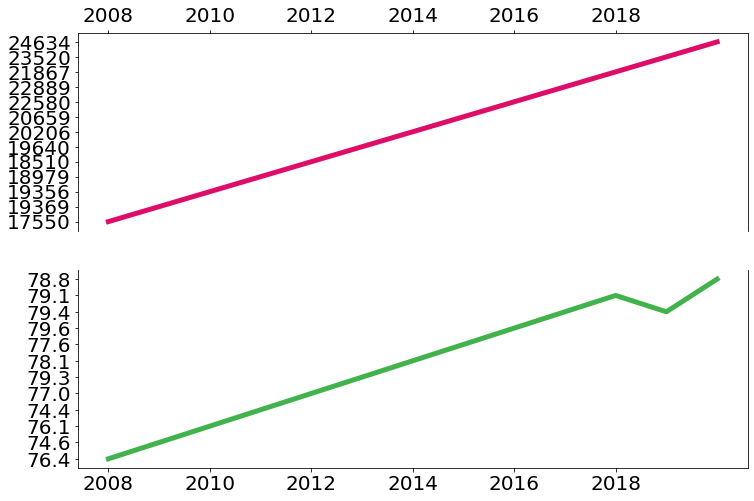

In [54]:
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)
ax2.plot(list(range(2008, 2021)), dict['Darlington'].loc['Economic activity rate - aged 16-64'][4:], color='#42B24C', linewidth=5)
ax.plot(list(range(2008, 2021)), dict['Darlington'].loc['earnings'][4:], color='#DE0E68', linewidth=5)

#ax2.set_ylim(0, 251)  # biodiversity ODA
#ax.set_ylim(250, 2501)  # total ODA

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labelsize=20, labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

plt.xticks(np.arange(2008, 2019, step=2), size=20)
ax2.tick_params(labelsize=20)

f.set_figheight(8)
f.set_figwidth(12)

plt.show()

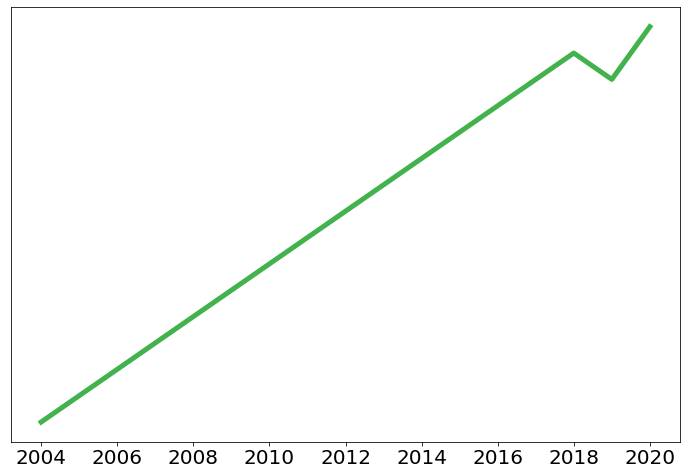

In [55]:
plt.figure(figsize=(12,8))
plt.plot(list(range(2004, 2021)), dict['Darlington'].loc['Economic activity rate - aged 16-64'], color='#42B24C', linewidth=5)
plt.xticks(np.arange(2004, 2021, step=2), size=20)
plt.yticks(np.arange(75, 80, step=25), size=20)
plt.show()

In [56]:
dict['Darlington'].loc['earnings'][4:]

year
2008    17550
2009    19369
2010    19356
2011    18979
2012    18510
2013    19640
2014    20206
2015    20659
2016    22580
2017    22889
2018    21867
2019    23520
2020    24634
Name: earnings, dtype: object

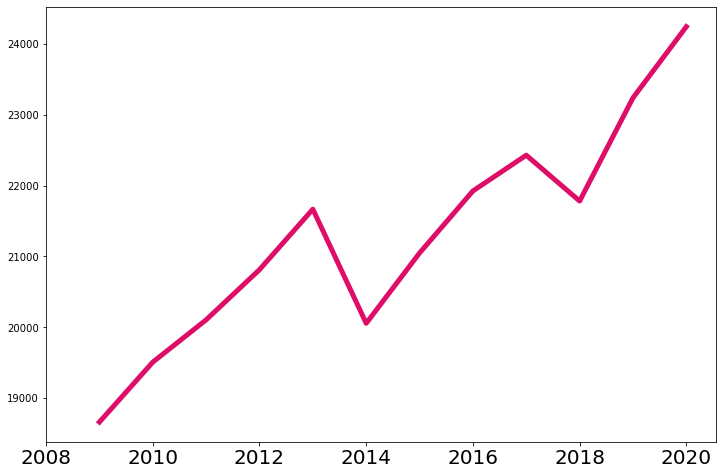

In [57]:
plt.figure(figsize=(12,8))
plt.plot(list(range(2008, 2021)), dict['Stockton-on-Tees'].loc['earnings'][4:], color='#DE0E68', linewidth=5)
plt.xticks(np.arange(2008, 2021, step=2), size=20)
plt.show()

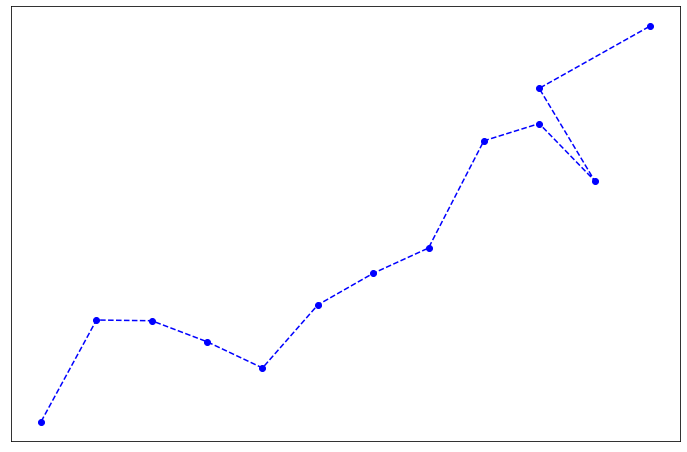

In [58]:
plt.figure(figsize=(12,8))
plt.yticks(np.arange(0, 2001, step=250), size=20)
plt.xticks(np.arange(0, 251, step=25), size=20)
plt.plot(dict['Darlington'].loc['Economic activity rate - aged 16-64'], dict['Darlington'].loc['earnings'], '--bo'); #, s=100, color='black')
plt.show()

## Standardization
The data is standardized for our purpose of analysis. 

In [59]:
variablename = list(dict['Darlington'].index.values)
dict_std = copy.deepcopy(dict)

for authority in authorityname:
    for variable in variablename[:-2]:
        # adding noise as representative for measurement errors
        #noise = np.random.normal(scale=0.1, size=len(dict_all_wb[country].loc[seriescode]))
        
        #dict_all_wb[country].loc[seriescode] = dict_all_wb[country].loc[seriescode] + noise
        
        dict_std[authority].loc[variable] = scale(dict[authority].loc[variable])

In [60]:
#check
print('Original value', dict['Darlington'].loc['Economic activity rate - aged 16-64'])
print('-------')
print('Standardised value', dict_std['Darlington'].loc['Economic activity rate - aged 16-64'])


#print('Original value', dict['City of London'].loc['% of economically inactive who do not want a job'])
#print('-------')
#print('Standardised value', dict_std['City of London'].loc['% of economically inactive who do not want a job'])

Original value year
2004    76.2
2005    75.6
2006    76.3
2007    76.7
2008    76.4
2009    74.6
2010    76.1
2011    74.4
2012    77.0
2013    79.3
2014    78.1
2015    77.6
2016    79.6
2017    79.4
2018    79.1
2019    79.4
2020    78.8
Name: Economic activity rate - aged 16-64, dtype: object
-------
Standardised value year
2004   -0.673431
2005   -1.031192
2006   -0.613805
2007   -0.375298
2008   -0.554178
2009   -1.627459
2010   -0.733058
2011   -1.746713
2012   -0.196417
2013    1.174997
2014    0.459477
2015    0.161343
2016    1.353878
2017    1.234624
2018    1.055744
2019    1.234624
2020    0.876864
Name: Economic activity rate - aged 16-64, dtype: object


In [63]:

# as csv files per grouping
if not os.path.exists('csv_standardised'):
    os.mkdir('csv_standardised')
    
for authority in authorityname:
    dict_std[authority].to_csv(r'csv_standardised/{}.csv'.format(authority))


# as one pickle file
stand = open('C:\\Users\\ALIENWARE\\Desktop\\Utils\\dict_std.pkl', 'wb')
pickle.dump(dict_std, stand)
stand.close()

## Count Missing value in the dataset

Counting missing values gives the result in dataset explanation chapter about the amount of missing values

In [61]:
variable = dict[authoritynm].index
yearval =  dict[authoritynm].columns

In [62]:
dict[authority]

year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Economic activity rate - aged 16-64,80.0,78.4,80.9,79.4,80.0,77.7,78.1,78.5,78.4,79.2,81.9,78.7,78.4,80.5,79.2,79.7,77.0
Employment rate - aged 16-64,77.0,74.9,76.9,75.2,76.7,72.7,73.4,72.4,74.2,73.2,77.3,73.2,75.5,78.0,76.1,77.8,74.5
% aged 16-64 who are employees,70.8,69.8,71.1,69.2,71.0,66.9,66.9,66.9,67.3,67.3,71.3,68.4,68.4,69.6,66.6,69.3,65.5
% aged 16-64 who are self employed,5.8,5.0,5.6,5.8,5.6,5.6,6.0,5.2,6.8,5.4,5.9,4.4,6.8,8.1,9.5,8.3,8.7
Unemployment rate - aged 16-64,3.8,4.5,4.9,5.3,4.1,6.3,6.0,7.8,5.4,7.6,5.6,7.0,3.8,3.2,3.9,2.3,3.2
Unemployment rate - aged 16+,3.9,4.5,5.1,5.2,4.2,6.4,6.0,7.7,5.3,7.5,5.5,6.9,3.9,3.3,3.9,2.2,3.1
% who are economically inactive - aged 16-64,20.0,21.6,19.1,20.6,20.0,22.3,21.9,21.5,21.6,20.8,18.1,21.3,21.6,19.5,20.8,20.3,23.0
% of economically inactive who want a job,22.1,26.1,25.3,25.9,26.2,31.5,32.2,32.0,29.9,22.9,26.9,20.8,19.9,26.3,31.9,24.4,29.0
% of economically inactive who do not want a job,77.9,73.9,74.7,74.1,73.8,68.5,67.8,68.0,70.1,77.1,73.1,79.2,80.1,73.7,68.1,75.6,71.0
Economic activity rate males - aged 16-64,85.7,82.4,86.5,86.1,86.6,84.7,84.9,84.0,83.6,83.1,84.8,83.8,83.3,85.3,86.8,83.1,78.9


In [64]:
Nannumber = 0
Allnumber = 0
for authority in authorityname:
    # here variable index is without earning dataset
    for var in [0,5,14,23,29,34,35,36,45]:
        Nannumber += dict[authority][var:var+1].iloc[:,4:].isnull().sum().sum()
        Allnumber += dict[authority][var:var+1].iloc[:,4:].isnull().sum().sum()
        Allnumber += dict[authority][var:var+1].iloc[:,4:].count().sum().sum()
                
print(f'Percentage of NaN in employment dataset is {Nannumber/Allnumber}, starting from 2008 onwards')


Percentage of NaN in employment dataset is 0.015475894116670816, starting from 2008 onwards


In [ ]:
Nannumber = 0
Allnumber = 0
for authority in authorityname:
    # here variable index is without earning dataset
    for var in [1]:
        Nannumber += dict[authority][var:var+1].iloc[:,4:].isnull().sum().sum()
        Allnumber += dict[authority][var:var+1].iloc[:,4:].isnull().sum().sum()
        Allnumber += dict[authority][var:var+1].iloc[:,4:].count().sum().sum()
                
print(f'Percentage of NaN in employment dataset is {Nannumber/Allnumber}, starting from 2008 onwards')


In [65]:
Nannumber = 0
Allnumber = 0
for authority in authorityname:
    # here variable index is all variable selected in the analysis
    for var in [0,1,5,14,23,29,34,35,36,45]:
        #from 2008 onwards so iloc from 4:
        Nannumber += dict[authority][var:var+1].iloc[:,4:].isnull().sum().sum()
        Allnumber += dict[authority][var:var+1].iloc[:,4:].isnull().sum().sum()
        Allnumber += dict[authority][var:var+1].iloc[:,4:].count().sum().sum()
                
print(f'Percentage of NaN in overall appended dataset is {Nannumber/Allnumber}, starting from 2008 onwards')


Percentage of NaN in overall appended dataset is 0.014563106796116505, starting from 2008 onwards


In particular, we consider the authority named Isle of Silly. The authority contains all NaN values.


In [68]:
Nannumber = 0
Allnumber = 0
for var in [0,1,5,14,23,29,34,35,36,45]:
        Nannumber += dict['Isles of Scilly'][var:var+1].isnull().sum().sum()
        Allnumber += dict['Isles of Scilly'][var:var+1].isnull().sum().sum()
        Allnumber += dict['Isles of Scilly'][var:var+1].count().sum().sum()
print(f'Percentage of NaN in Isles of Scilly is {Nannumber/Allnumber}')

Percentage of NaN in Isles of Scilly is 1.0
